In [61]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.model_selection import train_test_split
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [172]:
# specify your path
file_path = './resources/CA_LosAngeles_2016_NREL_data.csv'

df = pd.read_csv(file_path)

In [173]:
# Convert Cloud Type to their classification/label names

# For Reference:
# cloud_type units: 'N/A': -15,
#   'Clear': 0, 'Probably Clear': 1, 'Fog': 2, 'Water': 3, 'Super-Cooled Water': 4, 'Mixed': 5, 'Opaque Ice': 6, 
#   'Cirrus': 7, 'Overlapping': 8, 'Overshooting': 9, 'Unknown': 10, 'Dust': 11, 'Smoke': 12
mapping_dict = {0: 'Clear', 1: 'Probably Clear', 2: 'Fog', 3: 'Water', 4: 'Super-Cooled Water', 5: 'Mixed', 6: 'Opaque Ice', 7: 'Cirrus', 8: 'Overlapping', 9: 'Overshooting', 10: 'Unknown', 11: 'Dust', 12: 'Smoke'}

df['Cloud Type Name'] = df['Cloud Type'].map(mapping_dict)
df['Cloud Type Name'] = df['Cloud Type'].replace(mapping_dict)


# Add a column for the actual datetime value of the timeseries
df['time_index'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])

In [174]:
# y axis
global_horizontal_irradiance_df = df['GHI']

# x axes
time_index_df = df['time_index']

air_temperature_df = df['Temperature']
relative_humidity_df = df['Relative Humidity']
dew_point_df = df['Dew Point']
surface_albedo_df = df['Surface Albedo']
precipitable_water_df = df['Precipitable Water']
wind_speed_df = df['Wind Speed']
cloud_type_df = df['Cloud Type']

In [175]:
# set the index to the time
df.set_index('time_index', inplace=True)
df = df.resample('30min').asfreq()

df.index.freq = '30min'

In [176]:
df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Global Horizontal UV Irradiance (280-400nm),Global Horizontal UV Irradiance (295-385nm),Cloud Type Name
time_index,,,,,,,,,,,,,,,,,,,,,
2006-01-01 00:30:00,2006.0,1.0,1.0,0.0,30.0,13.1,26.0,218.0,40.0,7.0,...,98.14,86.28,0.14,983.0,1.5,236.0,2.8,0.0000,0.0000,Cirrus
2006-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-01 01:30:00,2006.0,1.0,1.0,1.0,30.0,12.4,0.0,0.0,0.0,7.0,...,100.00,97.55,0.14,983.0,1.2,231.0,1.5,0.0000,0.0000,Cirrus
2006-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-01 02:30:00,2006.0,1.0,1.0,2.0,30.0,12.0,0.0,0.0,0.0,8.0,...,100.00,109.29,0.14,984.0,1.1,219.0,1.1,0.0000,0.0000,Overlapping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-12-31 21:30:00,2006.0,12.0,31.0,21.0,30.0,15.9,92.0,822.0,486.0,8.0,...,44.40,61.28,0.14,990.0,1.2,250.0,2.9,22.9218,17.8893,Overlapping
2006-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-31 22:30:00,2006.0,12.0,31.0,22.0,30.0,14.8,86.0,729.0,361.0,7.0,...,50.40,67.77,0.14,990.0,1.2,258.0,3.0,15.2396,11.8315,Cirrus


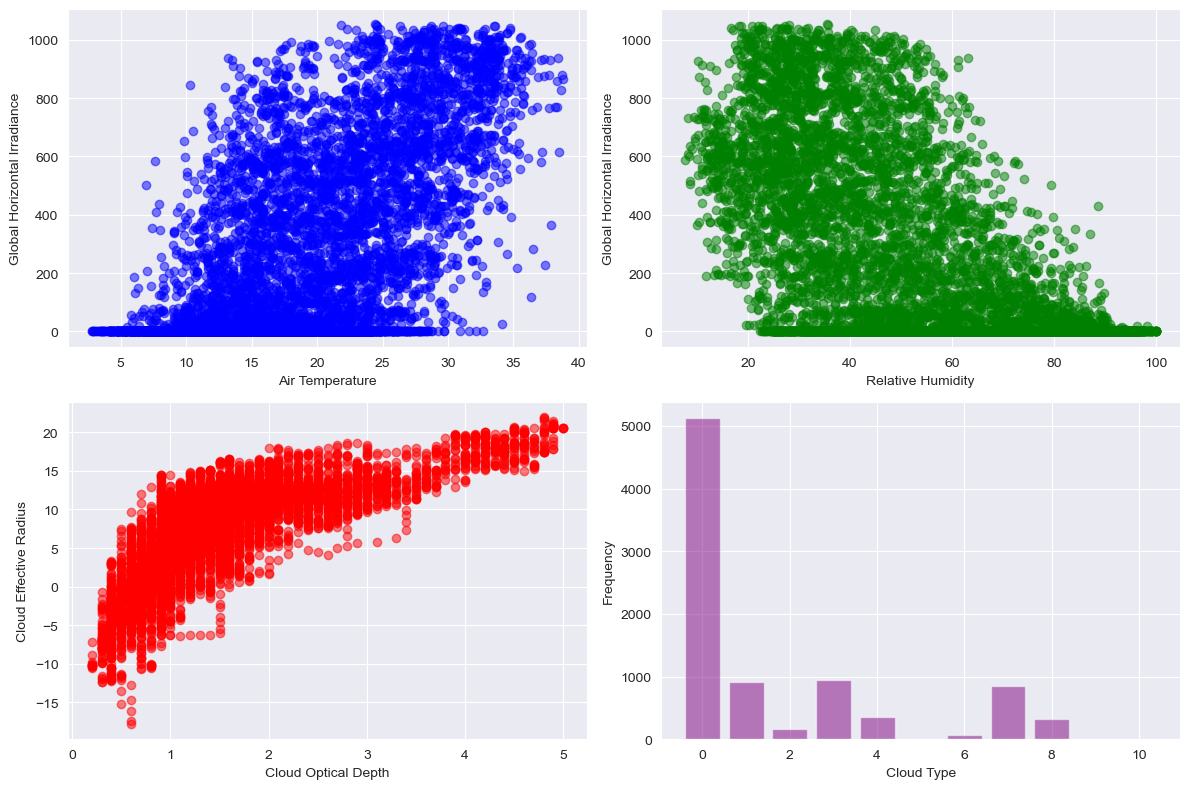

In [116]:
# Plotting the data
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1 - Global Horizontal Irradiance vs. Air Temperature
axs[0, 0].scatter(air_temperature_df, global_horizontal_irradiance_df, color='blue', alpha=0.5)
axs[0, 0].set_xlabel('Air Temperature')
axs[0, 0].set_ylabel('Global Horizontal Irradiance')

# Plot 2 - Global Horizontal Irradiance vs. Relative Humidity
axs[0, 1].scatter(relative_humidity_df, global_horizontal_irradiance_df, color='green', alpha=0.5)
axs[0, 1].set_xlabel('Relative Humidity')
axs[0, 1].set_ylabel('Global Horizontal Irradiance')

# Plot 3 - Cloud Optical Depth vs. Cloud Effective Radius
axs[1, 0].scatter(precipitable_water_df, dew_point_df, color='red', alpha=0.5)
axs[1, 0].set_xlabel('Cloud Optical Depth')
axs[1, 0].set_ylabel('Cloud Effective Radius')

# Plot 4 - Cloud Type Distribution
cloud_type_counts = cloud_type_df.value_counts()
axs[1, 1].bar(cloud_type_counts.index, cloud_type_counts.values, color='purple', alpha=0.5)
axs[1, 1].set_xlabel('Cloud Type')
axs[1, 1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [177]:
# Handle missing values if any
df.dropna(inplace=True)

# Split data into features (X) and target variable (y)
# First consolidate all input time series into a single DataFrame based on index (assuming they share the same index)
features_df = pd.concat(
    [air_temperature_df, relative_humidity_df, dew_point_df, surface_albedo_df, precipitable_water_df, wind_speed_df], axis=1)

# Append the target time series
target_df = pd.concat([global_horizontal_irradiance_df], axis=1)

# in the place of X and y use the columns we have extracted

# Standardize features
scaler = StandardScaler()

X_scaled = scaler.fit_transform(features_df)

# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target_df, test_size=0.2, random_state=42)

In [178]:
# Train ARIMA model
arima_model = ARIMA(y_train, order=(5, 1, 0))

arima_result = arima_model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [179]:
# Train SARIMA model
sarima_model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))

sarima_result = sarima_model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [180]:
# Train SVR model

svr_model = SVR(kernel='rbf')

svr_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [181]:
# Train MLPRegressor (ANN) model

ann_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')

ann_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 50))

In [182]:
# Train RandomForestRegressor (Ensemble) model
rf_model = RandomForestRegressor(n_estimators=100)

rf_model.fit(X_train, y_train)

C:\Users\barnh\AppData\Local\Temp\ipykernel_12716\2241156601.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [183]:
# Make predictions
arima_preds = arima_result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

sarima_preds = sarima_result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

svr_preds = svr_model.predict(X_test)

ann_preds = ann_model.predict(X_test)

rf_preds = rf_model.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [185]:
# Evaluate models
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return mae, mse, r2

In [186]:
arima_metrics = evaluate_model(y_test, arima_preds)

sarima_metrics = evaluate_model(y_test, sarima_preds)

svr_metrics = evaluate_model(y_test, svr_preds)

ann_metrics = evaluate_model(y_test, ann_preds)

rf_metrics = evaluate_model(y_test, rf_preds)

In [187]:
print("ARIMA Metrics:", arima_metrics)

print("SARIMA Metrics:", sarima_metrics)

print("SVR Metrics:", svr_metrics)

print("ANN Metrics:", ann_metrics)

print("RandomForest Metrics:", rf_metrics)

ARIMA Metrics: (331.99616790342554, 127558.26579389651, -0.34246440243002874)
SARIMA Metrics: (260.86213556904795, 94975.72459303636, 0.0004447883670561925)
SVR Metrics: (137.67783634901153, 45417.577563037434, 0.522010739613709)
ANN Metrics: (100.84318941064058, 23853.783282927307, 0.7489550777340321)
RandomForest Metrics: (89.06857305936072, 21117.53620821918, 0.7777522260112293)


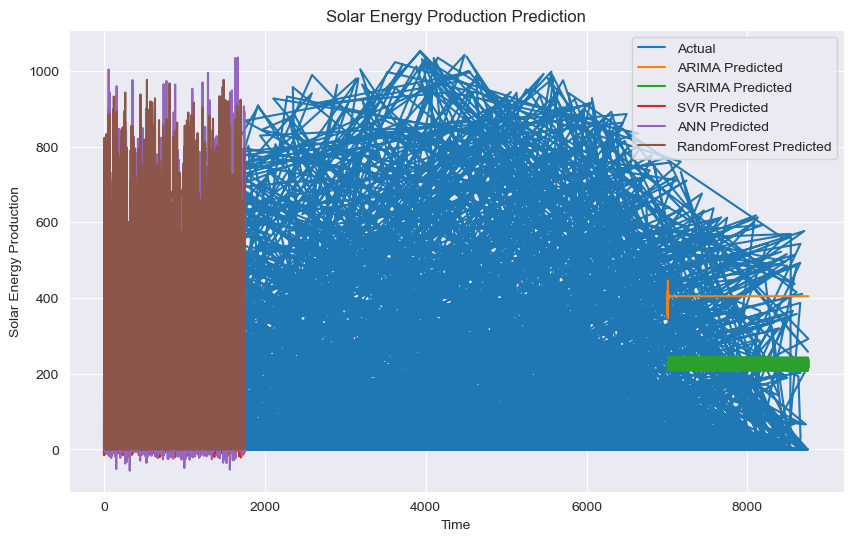

In [188]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))

plt.plot(y_test, label='Actual')
plt.plot(arima_preds, label='ARIMA Predicted')
plt.plot(sarima_preds, label='SARIMA Predicted')
plt.plot(svr_preds, label='SVR Predicted')
plt.plot(ann_preds, label='ANN Predicted')
plt.plot(rf_preds, label='RandomForest Predicted')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Solar Energy Production')

plt.title('Solar Energy Production Prediction')

# forecast is a pandas DataFrame that contains the forecasted values for all columns in the test set
plt.show()